In [1]:
import sklearn.datasets as ds
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, multivariate_normal
import random
import pandas as pd

- rozkłady cech w różnych zbiorach danych

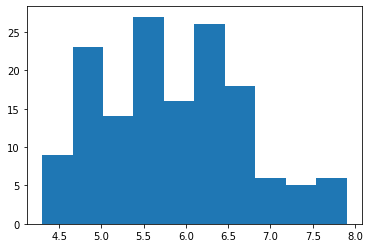

In [2]:
X, y = ds.load_iris(return_X_y=True)
sample = [X_el[0] for X_el in X]
plt.hist(sample)
plt.show()

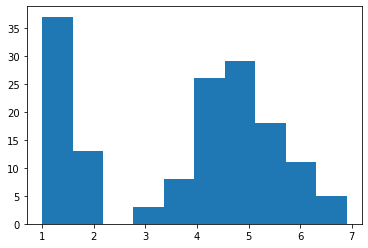

In [3]:
sample = [X_el[2] for X_el in X]
plt.hist(sample)
plt.show()

In [4]:
california_housing = ds.fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

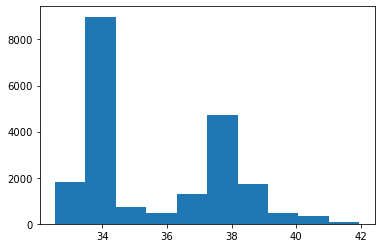

In [5]:
sample = [X_el[6] for X_el in california_housing.data]
plt.hist(sample)
plt.show()

- generowanie danych o zadanym rozkładzie:

    - bez zaburzenia:

In [6]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

    - z zaburzeniem

In [7]:
def disturb_sample(sample):
    max_sample = max(sample)
    for sample_el in sample:
        sample_el += max_sample * random.random() * 2 - 1
    return sample
        
sample1 = disturb_sample(sample1)
sample2 = disturb_sample(sample2)
sample = np.hstack((sample1, sample2))

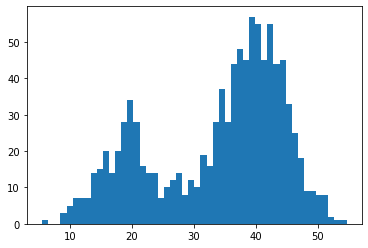

In [8]:
plt.hist(sample, bins=50)
plt.show()

In [9]:
sample = sample.reshape((len(sample), 1))
# próbki prawdopodobieństw dla szeregu wyników
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))

In [10]:
# hiperparametry - bandwith i różne kernele (są też inne hp)
kernels_available = {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'}
colors = ['red', 'green', 'blue', 'brown', 'orange', 'purple']

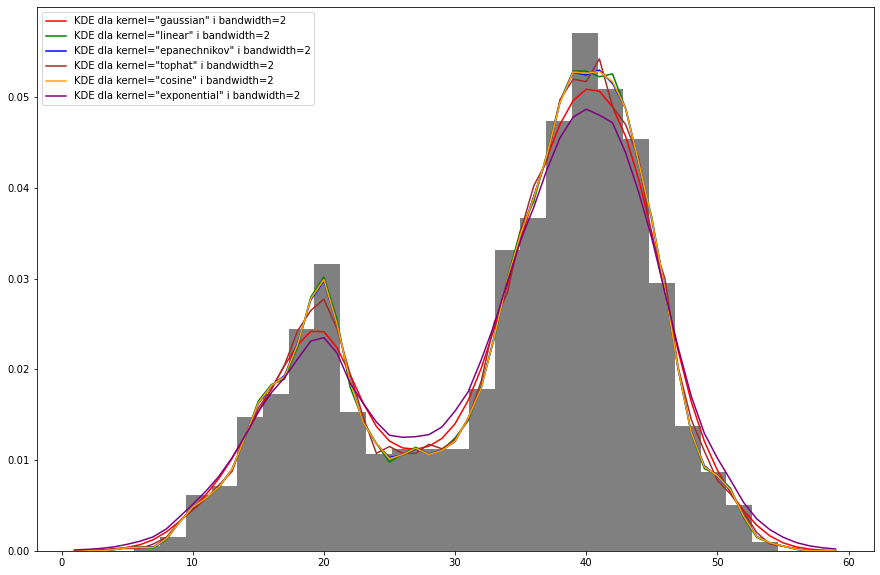

In [12]:
plt.rcParams["figure.figsize"] = (15, 10)

def plot_KDE_different_kernels(kernels_to_plot, bandwidths_to_plot):
    for kernel, color in zip(kernels_to_plot, colors):
        for bandwidth in bandwidths_to_plot:
            model = KernelDensity(bandwidth=bandwidth, kernel=kernel)
            model.fit(sample)
            probabilities = model.score_samples(values)
            probabilities = np.exp(probabilities)
            plt.hist(sample, bins=25, density=True, color='grey')
            plt.plot(values, probabilities, label=f'KDE dla kernel="{kernel}" i bandwidth={bandwidth}', color=color)
    plt.legend(loc='upper left')
    plt.show()
    
plot_KDE_different_kernels(kernels_available, [2])

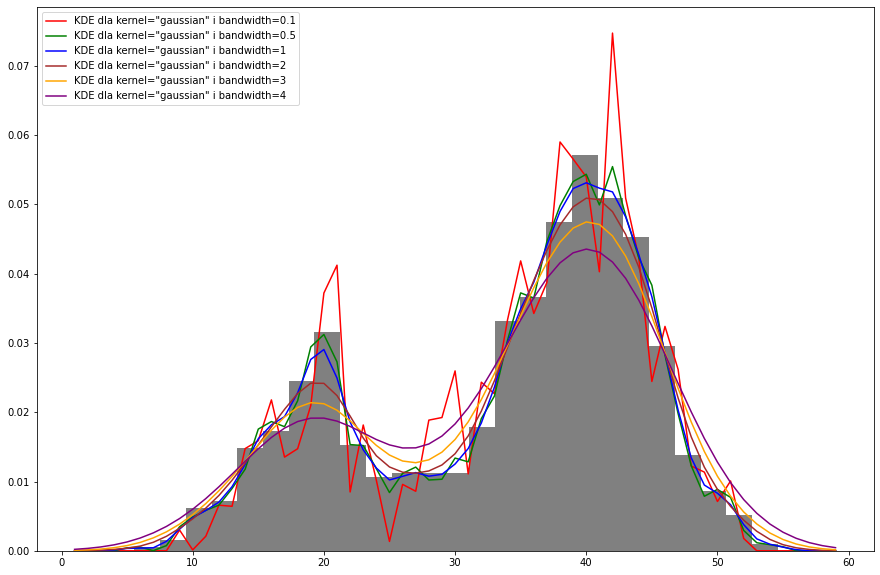

In [16]:
bandwidths_range = [0.1, 0.5, 1, 2, 3, 4]

def plot_KDE_different_bandwidths(kernels_to_plot, bandwidths_to_plot):
    for kernel in kernels_to_plot:
        for bandwidth, color in zip(bandwidths_to_plot, colors):
            model = KernelDensity(bandwidth=bandwidth, kernel=kernel)
            model.fit(sample)
            probabilities = model.score_samples(values)
            probabilities = np.exp(probabilities)
            plt.hist(sample, bins=25, density=True, color='grey')
            plt.plot(values, probabilities, label=f'KDE dla kernel="{kernel}" i bandwidth={bandwidth}', color=color)
    plt.legend(loc='upper left')
    plt.show()
    
plot_KDE_different_bandwidths(['gaussian'], bandwidths_range)

### 2D:

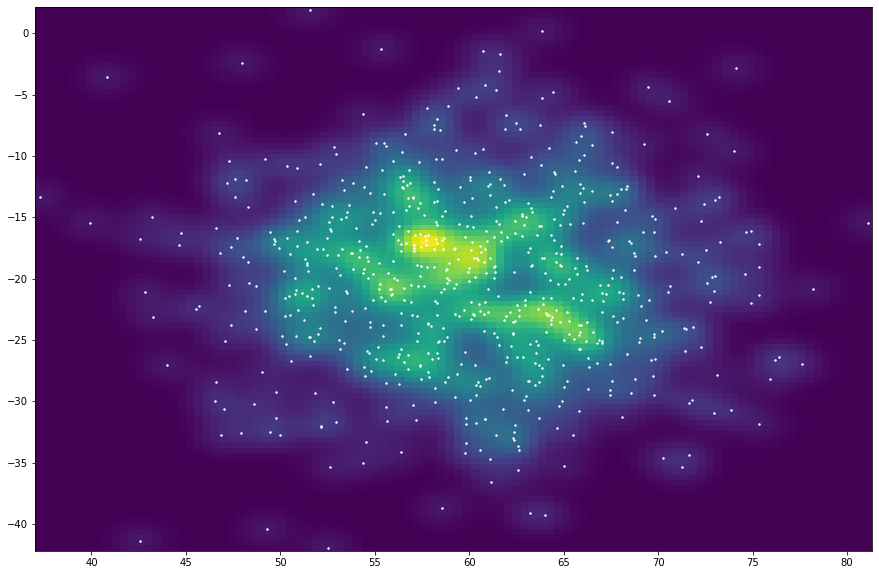

In [17]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j): 
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    model = KernelDensity(bandwidth=bandwidth)
    model.fit(xy_train)

    z = np.exp(model.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

# na potrzeby wizualizacji 2D tylko jeden przykład źródła
sample1 = normal(loc=20, scale=5, size=700)
sample2 = normal(loc=40, scale=5, size=700)

x, y = sample1 + sample2, sample1 - sample2

# tak samo tutaj, użyty domyślny kernel i bandwidth=1
xx, yy, zz = kde2D(x, y, 1)

plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white')

plt.show()